In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [20]:
data=load_iris()
X=data.data
y=data.target

In [21]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [22]:
x_scale=scale.fit_transform(X)

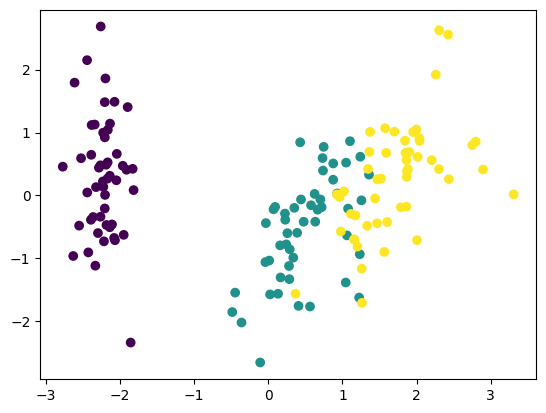

In [23]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_scaled=pca.fit_transform(x_scale)
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=y)

In [24]:
import scipy.cluster.hierarchy as sc

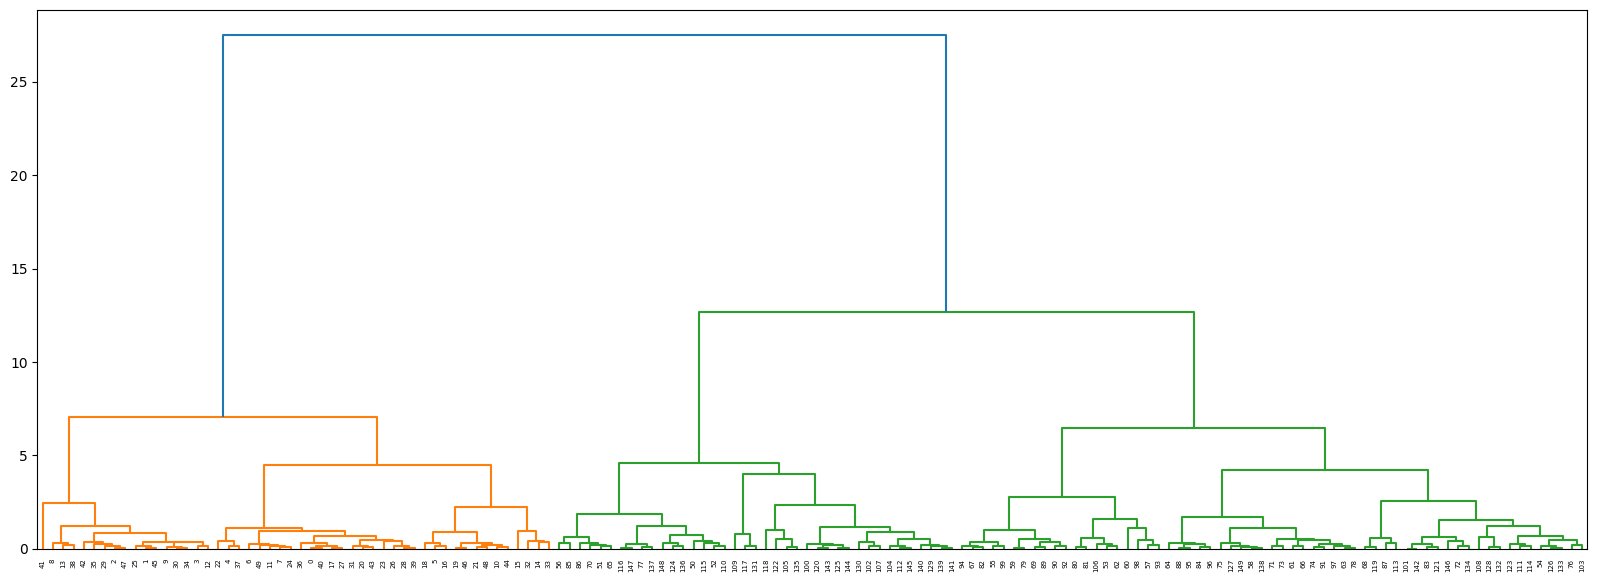

In [25]:
plt.figure(figsize=(20,7))
sc.dendrogram(sc.linkage(pca_scaled,method="ward"))
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric="euclidean",linkage="ward")

In [27]:
cluster.fit(pca_scaled)

AgglomerativeClustering()

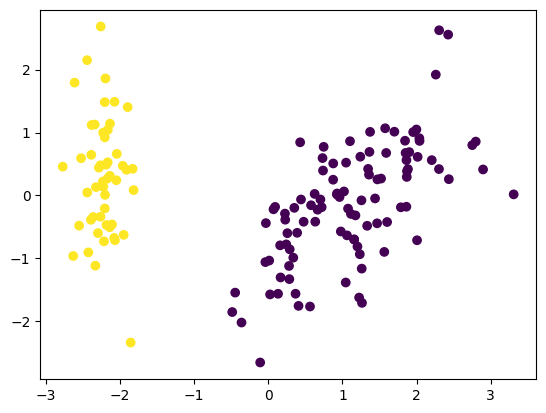

In [28]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [29]:
from sklearn.metrics import silhouette_score
sil=[]

for k in range(2,11):
    model=AgglomerativeClustering(n_clusters=k,metric="euclidean",linkage="ward")
    model.fit_predict(pca_scaled)
    sc=silhouette_score(pca_scaled,model.labels_)

    sil.append(sc)
sil

[np.float64(0.6145202036230452),
 np.float64(0.511059598876619),
 np.float64(0.4487350420958893),
 np.float64(0.4041689631006267),
 np.float64(0.3672112889583074),
 np.float64(0.3706820678912666),
 np.float64(0.3930552606912111),
 np.float64(0.4183694466469872),
 np.float64(0.405420562888949)]